# 가구수 나이로 구분해서 따로따로 재현자료를 만들었을 때 

* 가구주 나이 : G1 (30세 미만) , G2 (30 ~ 40세 미만) , G3 (40 ~ 50세 미만) , G4 (50 ~ 60세 미만) , G5 (60세이상)

## 선택한 변수 : 
범주형 변수 : 수도권 여부 , 가구주 성별 , 학교(학력코드) , 나이   
연속형 변수 : 근로소득 , 사업소득 , 재산소득 , 공적이전소득 , 사적이전소득

* 수도권 여부 : G1 (수도권) , G2 (비수도권)
* 가구주 성별 : 1 (남자) , 2 (여자)
* 학력코드(학교) : 1 (안받음) , 2 (초등학교) , 3 (중학교) , 4 (고등학교) , 5 (대학 (3년제 이하)) , 6 (대학교 (4년제 이상)) , 7 (대학원 이상)
* 가구주 나이 : G1 (30세 미만) , G2 (30 ~ 40세 미만) , G3 (40 ~ 50세 미만) , G4 (50 ~ 60세 미만) , G5 (60세이상)

## 변수 설명 

경상소득 : 비교적 오랫동안 정기적으로 얻는 소득  
( 경상소득 = 근로소득 + 사업소득 + 재산소득 + 공적이전소득 + 사적이전소득 )
1.   근로소득 : 사업체에 고용되어 근로를 제공한 대가로 받은 모든 현금과 현물을 의미한다. 여기에서 현물이란 가구소득 정의에서와 마찬가지로 재화와 서비스를 포함하는 개념.  
2.   사업소득 : 비법인기업의 주인이 해당 사업체를 운영하여 얻은 순수입이다. 여기에서 순수입이란 총수입액 또는 총매출액에서 영업비용 등 생산에 사용한 생산비용을 제외한 금액을 의미한다.
3.   재산소득 : 소유한 재산을 타인이 사용한 대가로 받은 순수입이다. 여기에는 임대소득, 이자소득, 배당소득, 연금소득, 상표 사용료/인세/사용료 등이 포함된다.
  * 임대소득은 기본적으로 주택, 건물, 토지, 기계장비 등의 자산을 빌려주고 받은 소득을 의미한다. 그런데 통계청에서는 토지 임대소득만 재산소득에 포함시키고 그 외의 부동산과 기계장비 임대소득은 사업소득으로 분류합니다.
  *   이자소득은 저금이나 채권 등으로 얻은 이자수입 또는 다른 가구나 사업체에 돈을 빌려주고 받은 이자수입을 의미한다.
  *   배당소득은 직접 업무에는 참여하지 않고 투자만 한 사업체로부터 받은 수입을 의미한다.
  *   상표 사용료/인세/사용료는 저서나 창작물 등 특허나 저작권이 있는 자료를 사용하게 해준 대가로 받은 소득을 의미한다.
4. 공적이전소득 : 국민연금, 공무원연금 등의 공적연금, 기초연금 등을 일컫는다. 
5. 사적이전소득 : 부양의무자 또는 후원자 등으로부터 정기적으로 지원받는 금품



# 패키지 설치

colab에서 실행했을 때는 시각화 패키지를 미리 설치하고 런타임 다시 시작하기를 통해서 다시 설치작업을 통해서 plot이나 시각화 작업을 할 때 한글을 적용 할 수 있다.


## 시각화 패키지 설치 

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기

데이터 작업은 서버용 컴퓨터를 통해서 작업했으며 코드는 따로 원드라이브에 올려놓음.

서버를 이용해 나이별로 재현자료를 생성해 만든 자료를 불러옴 

나이별로 만든 재현자료란?  
-> 위에서 보이는 가구주 나이 : 원자료를 G1~G5로 나누어서 각각 변수별로 저장해서 CTGAN 패키지를 이용해 재현자료를 각각의 범주의 해당되는 숫자만큼 재현자료를 만들어서 concat함수를 이용해 합친 자료를 의미한다. 

In [ ]:
from google.colab import files
myfile = files.upload()

Saving synthetic_data.csv to synthetic_data.csv


나이별 나눈 재현자료 ( = synthetic_data )

In [ ]:
import io
import pandas as pd
synthetic_data = pd.read_csv(io.BytesIO(myfile['synthetic_data.csv']), encoding='UTF-8')
synthetic_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

원자료 ( = oridata )

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 2016_housemasterdata.csv to 2016_housemasterdata.csv


In [ ]:
rawdata = pd.read_csv(io.BytesIO(myfile['2016_housemasterdata.csv']), encoding='cp949')
variable = ['수도권여부','가구주_성별코드','가구주_교육정도_학력코드','가구주_연령10세단위코드','경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]']
oridata = rawdata[variable]
oridata.rename(columns = {'경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]' : "경상소득_사적이전소득(조사)"},inplace=True)

<ipython-input-7-be6e37d4bd70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oridata.rename(columns = {'경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]' : "경상소득_사적이전소득(조사)"},inplace=True)


그냥 재현자료 돌린 것 ( = allsynthetic_data )

In [ ]:
from google.colab import files
myfile = files.upload()

Saving synthetic.csv to synthetic.csv


In [ ]:
allsynthetic_data = pd.read_csv(io.BytesIO(myfile['synthetic.csv']), encoding='UTF-8')
allsynthetic_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

# 연속형 자료 산점도

나이 범주 나눈 재현자료와 원자료간의 비교 

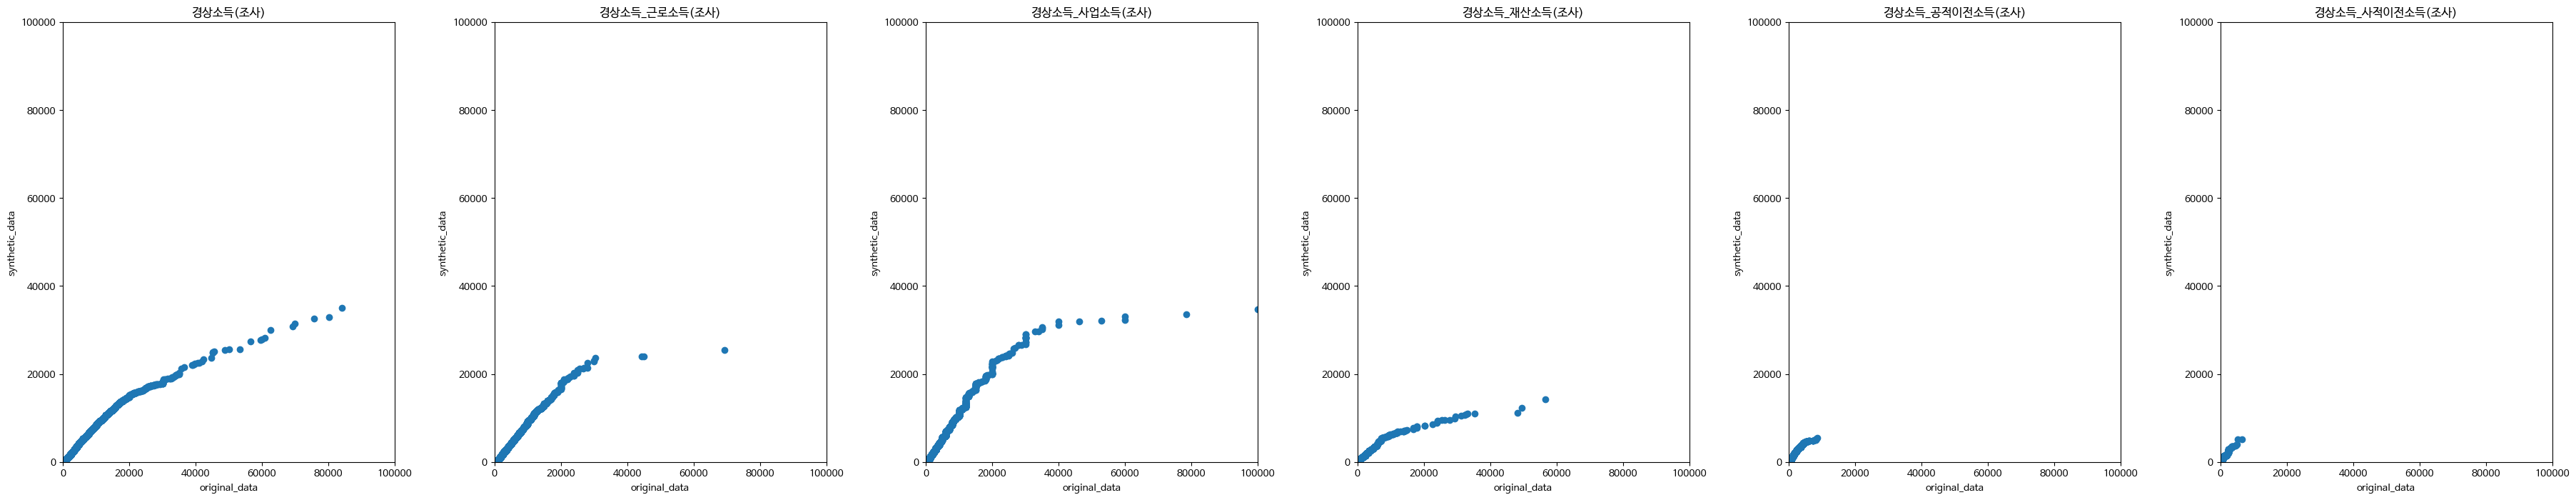

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(45, 8))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].scatter(oridata[numerics[i]].sort_values(),synthetic_data[numerics[i]].sort_values())
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('original_data', fontsize=10)
  axs[i].set_ylabel('synthetic_data', fontsize=10)
  axs[i].set_xlim(0,100000)
  axs[i].set_ylim(0,100000)

그냥 CTGAN 돌린 재현자료 vs 원자료 

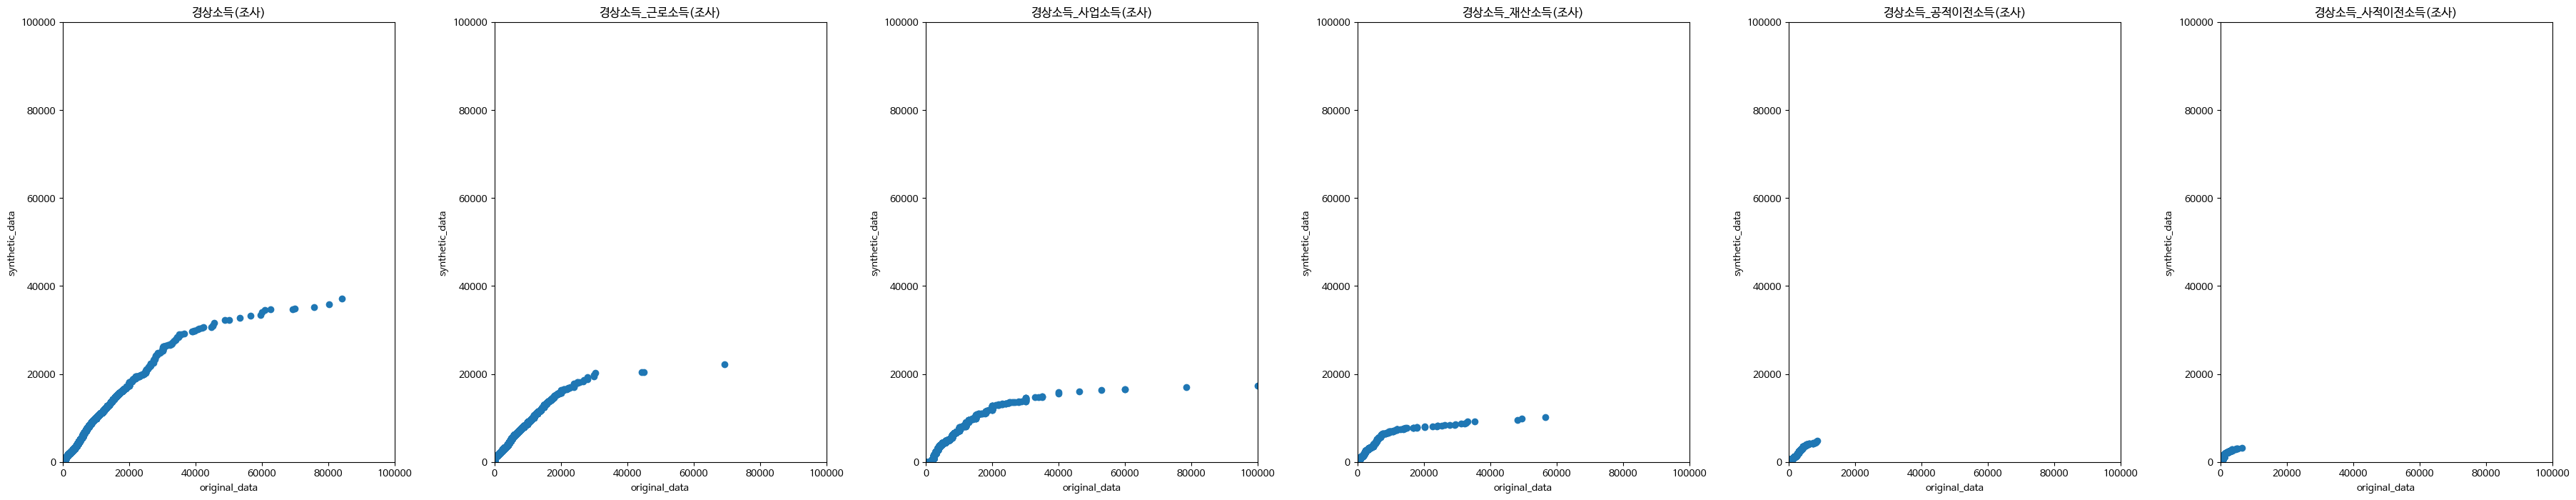

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(45, 8))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].scatter(oridata[numerics[i]].sort_values(),allsynthetic_data[numerics[i]].sort_values())
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('original_data', fontsize=10)
  axs[i].set_ylabel('synthetic_data', fontsize=10)
  axs[i].set_xlim(0,100000)
  axs[i].set_ylim(0,100000)

산점도를 관찰 했을 때 나이 범주로 나눈 재현자료가 전체 다를 재현한 재현자료보다 훨씬 더 재현을 잘하는 것을 관찰 할 수 있다.

# 범주형 막대그래프 

## 성별 막대그래프 

원자료 vs 전체재현자료 vs 나이범주로 나눈 재현자료 비교

In [ ]:
import numpy as np
sample_men = oridata[oridata['가구주_성별코드']==1].value_counts() # 1 = 원자료 남자 
sample_women = oridata[oridata['가구주_성별코드']==2].value_counts() # 2 = 원자료 여자
new_data_men = synthetic_data[synthetic_data['가구주_성별코드']==1].value_counts() # 1 = 나이범주 재현자료 남자 
new_data_women = synthetic_data[synthetic_data['가구주_성별코드']==2].value_counts() # 2 = 나이범주 재현자료 여자 
synthetic_data_men = allsynthetic_data[allsynthetic_data['가구주_성별코드']==1].value_counts() # 1 = 전체재현자료 남자 
synthetic_data_women = allsynthetic_data[allsynthetic_data['가구주_성별코드']==2].value_counts() # 2 = 전체재현자료 여자 

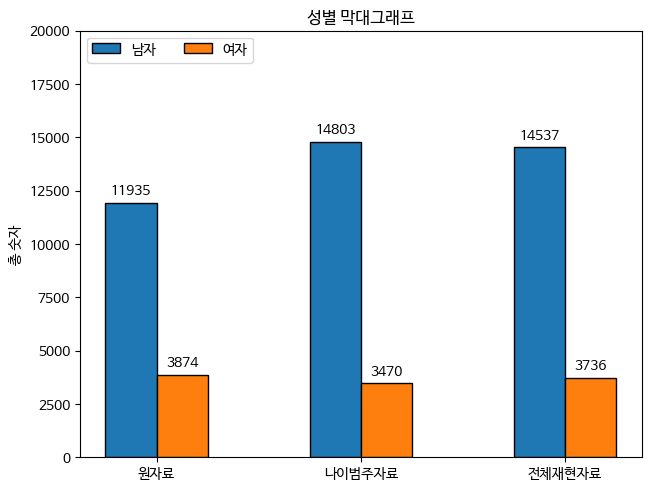

In [ ]:
datas = ("원자료","나이범주자료","전체재현자료")
gender = ["남자","여자"]
graph_data = {
    '남자' : (len(sample_men),len(new_data_men),len(synthetic_data_men)),
    '여자' : (len(sample_women),len(new_data_women),len(synthetic_data_women))
}

x = np.arange(len(datas))
width = +0.25  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in graph_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute , edgecolor = 'black')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('총 숫자')
ax.set_title('성별 막대그래프')
ax.set_xticks(x + width/2, datas)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20000)

plt.show()

저번결과도 그렇고 여자는 얼추 재현을 잘 하는 것으로 보이지만 남자는 재현을 잘 못하는 것으로 관찰됨 why? 

나이 범주 나눈 재현자료 vs 원자료 

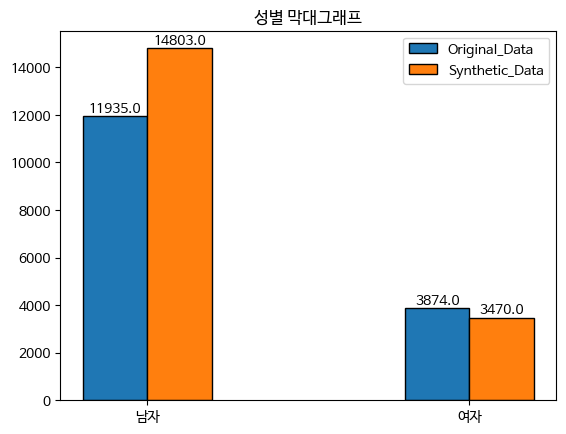

In [ ]:
# Define Data

gender = ["남자","여자"]
original = [len(sample_men),len(sample_women)]
news_data = [len(new_data_men),len(new_data_women)]
synthetics_data = [len(synthetic_data_men),len(synthetic_data_women)]
x_axis = np.arange(len(gender))

# Multi bar Chart

bar1 = plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data' , edgecolor = 'black')
bar2 = plt.bar(x_axis +0.20*2, news_data, width=0.2, label = 'Synthetic_Data' , edgecolor = 'black')

# Xticks

plt.xticks(x_axis+0.3,gender)

# Add legend

plt.legend()

# Add title
plt.title('성별 막대그래프')

# 막대그래프 숫자 넣기 

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)

# Display

plt.show()

## 지역 막대그래프 

원자료 vs 전체재현자료 vs 나이범주로 나눈 재현자료 비교

In [ ]:
sample_capital = oridata[oridata['수도권여부']=='G1'].value_counts() # G1 = 수도권 
sample_province = oridata[oridata['수도권여부']=='G2'].value_counts() # G2 = 지방
new_data_capital = synthetic_data[synthetic_data['수도권여부']=='G1'].value_counts()
new_data_province = synthetic_data[synthetic_data['수도권여부']=='G2'].value_counts()
synthetic_data_capital = allsynthetic_data[allsynthetic_data['수도권여부']=='G1'].value_counts() # 1 = 전체재현자료 남자 
synthetic_data_province = allsynthetic_data[allsynthetic_data['수도권여부']=='G2'].value_counts() # 2 = 전체재현자료 여자 

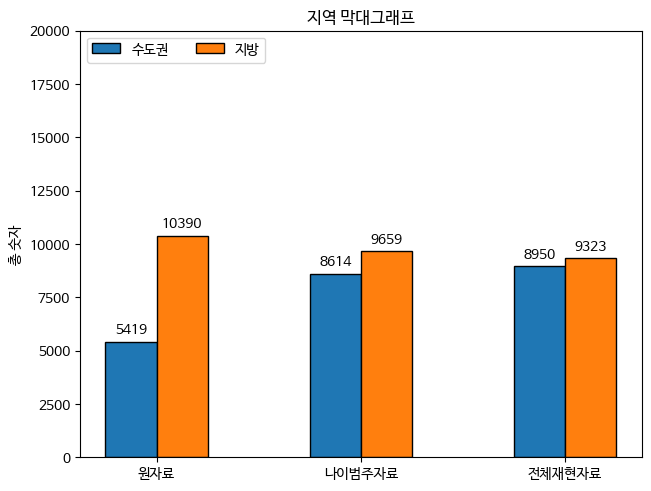

In [ ]:
datas = ("원자료","나이범주자료","전체재현자료")
gender = ["수도권","지방"]
graph_data = {
    '수도권' : (len(sample_capital),len(new_data_capital),len(synthetic_data_capital)),
    '지방' : (len(sample_province),len(new_data_province),len(synthetic_data_province))
}

x = np.arange(len(datas))
width = +0.25  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in graph_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute , edgecolor = 'black')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('총 숫자')
ax.set_title('지역 막대그래프')
ax.set_xticks(x + width/2, datas)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20000)

plt.show()

지방같은 경우에는 재현을 잘 하는 것으로 보이지만 수도권같은 경우에는 재현을 잘 못하는 것으로 관찰된다. why? 

나이 범주 나눈 재현자료 vs 원자료 

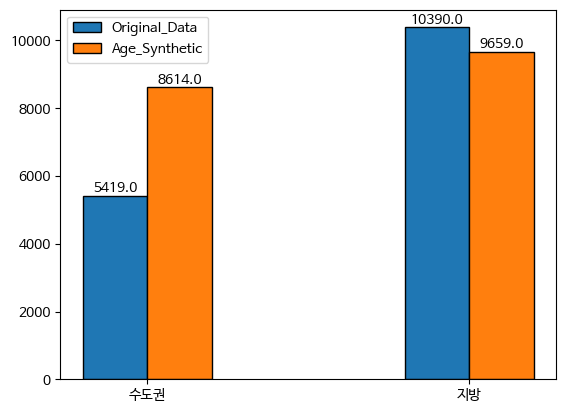

In [ ]:
# Define Data

region = ["수도권","지방"] 
original = [len(sample_capital),len(sample_province)]
news_data = [len(new_data_capital),len(new_data_province)]
x_axis = np.arange(len(region))

# Multi bar Chart

bar3 = plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data',edgecolor = 'black')
bar4 = plt.bar(x_axis +0.20*2, news_data, width=0.2, label = 'Age_Synthetic',edgecolor = 'black')

# Xticks

plt.xticks(x_axis+0.3,region)

# Add legend

plt.legend()

# 막대그래프에 숫자 넣기 


for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)

# Display

plt.show()

# 데이터 로그화

왜 데이터 로그화를 하는가? 정규성을 더 잘 보이고, 데이터간의 편차를 줄여 분석에서 더 정확한 값을 얻기 위해서이다.

원자료 로그화 

In [ ]:
# 데이터 타입이 수치형인 칼럼만 채택
import pandas as pd
numeric = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
col1 = oridata[numeric]
log_df1 = np.log1p(col1) # log1p를 한 이유는 일반 log 함수를 썼을 때 0이 -inf로 나오는 오류때문
log_df1

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,9.105091,8.294300,8.517393,0.000000,0.000000,0.0
1,8.076205,8.006701,0.000000,0.000000,5.379897,0.0
2,9.441531,9.441531,0.000000,0.000000,0.000000,0.0
3,8.425297,0.000000,8.343078,0.000000,5.888878,0.0
4,9.427144,9.427144,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
18268,6.968850,6.790097,4.615121,0.000000,4.317488,0.0
18269,5.666427,0.000000,0.000000,3.713572,5.517453,0.0
18270,8.420903,8.412055,0.000000,3.713572,0.000000,0.0
18271,7.678326,7.678326,0.000000,0.000000,0.000000,0.0


나이범주 재현자료 로그화 

In [ ]:
col2 = synthetic_data[numeric]
log_df2 = np.log1p(col2)
log_df2

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,8.904087,5.739793,2.197225,0.000000,7.027315,2.995732
1,9.005650,9.109636,4.753590,1.098612,2.397895,4.043051
2,8.694000,8.347353,4.077537,0.000000,3.332205,3.951244
3,7.489971,8.794673,4.234107,0.000000,3.218876,4.007333
4,7.720905,8.051660,0.000000,0.000000,0.000000,2.944439
...,...,...,...,...,...,...
18268,6.255750,3.891820,2.484907,2.708050,5.537334,2.197225
18269,6.424869,7.718685,3.663562,2.397895,7.017506,5.537334
18270,8.631593,3.951244,4.094345,0.000000,3.663562,0.000000
18271,6.182085,0.000000,5.513429,4.219508,6.137727,2.564949


그냥 CTGAN 돌린 재현자료

In [ ]:
col3 = allsynthetic_data[numeric]
log_df3 = np.log1p(col3)
log_df3

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,5.755742,6.947937,0.000000,1.791759,5.537334,6.864848
1,8.586159,9.566895,2.079442,1.791759,5.758902,0.693147
2,9.352534,8.798606,8.997766,6.326149,0.000000,0.000000
3,7.843456,3.332205,0.000000,1.791759,0.000000,0.693147
4,8.320692,7.600902,3.332205,0.000000,0.000000,4.890349
...,...,...,...,...,...,...
18268,7.956477,7.436617,0.000000,1.791759,6.525030,0.693147
18269,8.923724,7.771910,1.609438,1.609438,0.000000,0.000000
18270,8.120589,8.244597,2.639057,1.386294,4.406719,0.693147
18271,9.063000,0.000000,3.044522,0.693147,0.000000,0.693147


# 연속형 자료 상자그림 

## 로그화 하지 않은 데이터를 이용한 상자그림 

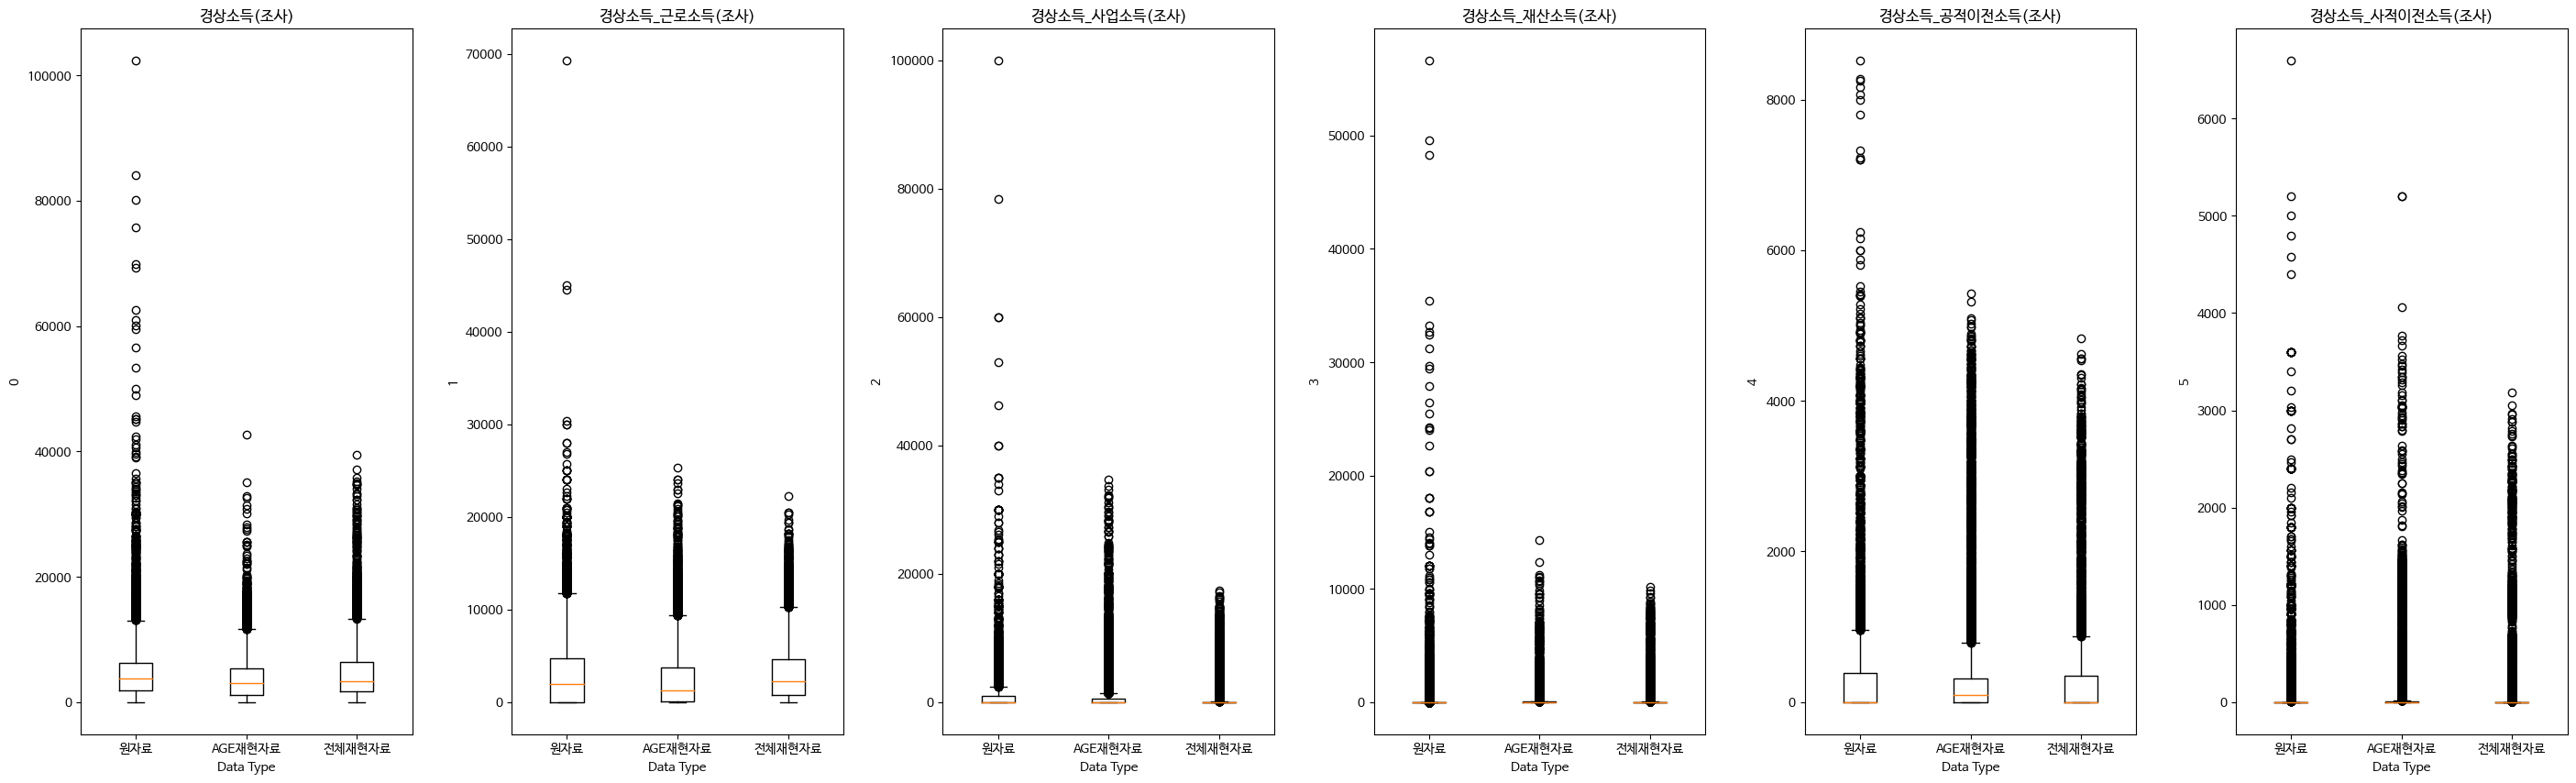

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(35, 10))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].boxplot([oridata[numerics[i]],synthetic_data[numerics[i]],allsynthetic_data[numerics[i]]])
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('Data Type')
  axs[i].set_ylabel(i)
  axs[i].set_xticks([1,2,3],['원자료','AGE재현자료','전체재현자료'])

재산소득과 사적이전소득의 경우 해당되는 사람이 많지가 않으므로 상자그림이 저렇게 표현된다.

재현은 전체재현자료보다는 나이범주별로 나눈 재현자료가 훨씬 더 재현을 잘 하는 것으로 판단된다.

## 데이터 로그화한 자료를 이용한 상자그림  

원자료 vs 재현자료 ( 로그 o ) - 나이 범주 나눈 재현자료

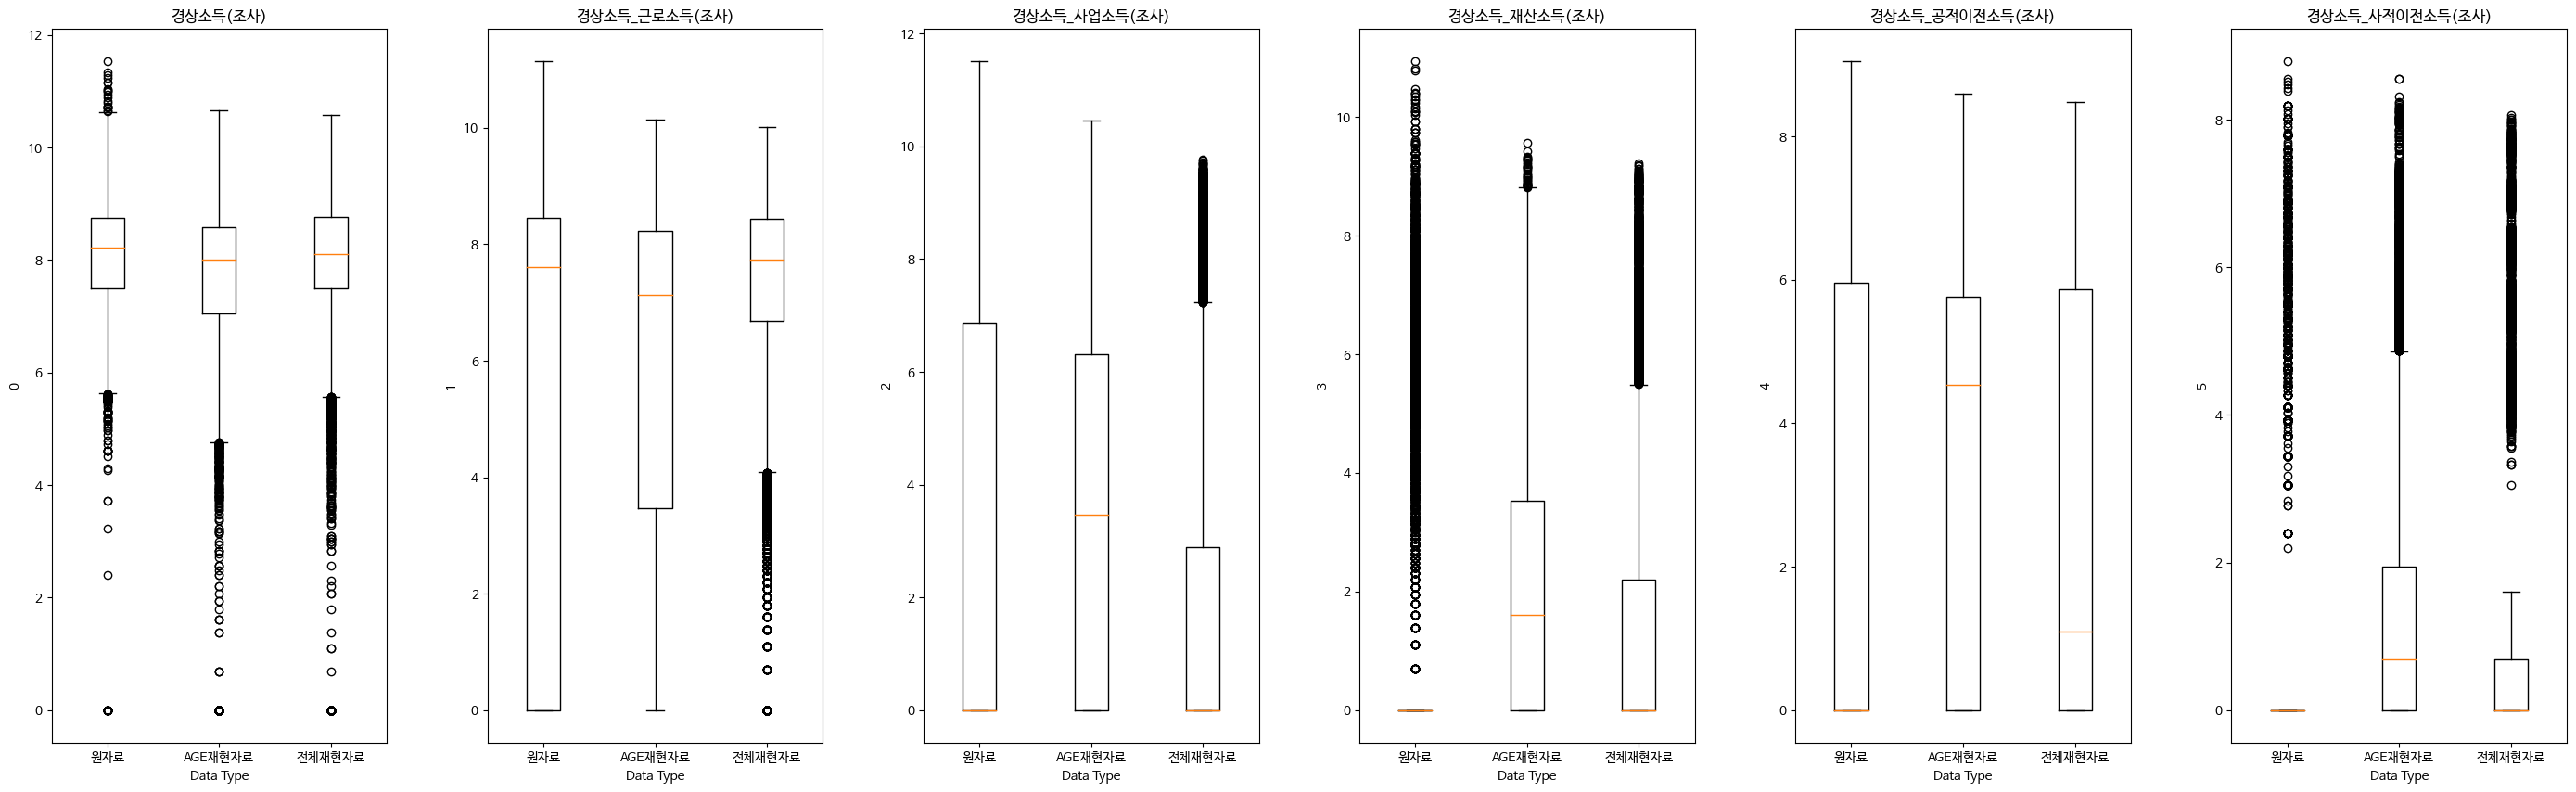

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(35, 10))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].boxplot([log_df1[numerics[i]],log_df2[numerics[i]],log_df3[numerics[i]]])
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('Data Type')
  axs[i].set_ylabel(i)
  axs[i].set_xticks([1,2,3],['원자료','AGE재현자료','전체재현자료'])

# 기초통계량 

In [ ]:
def summary(a):
  summary1 = pd.DataFrame(oridata[a].describe())
  summary2 = pd.DataFrame(synthetic_data[a].describe())
  summary3 = pd.DataFrame(allsynthetic_data[a].describe())
  colnames=[a]
  result = pd.concat([summary1,summary2,summary3],axis=1,keys=['원자료','AGE재현자료','전체재현자료'])
  return result

In [ ]:
def allsummary(a):
  summary1 = pd.DataFrame(oridata[a].describe())
  summary2 = pd.DataFrame(allsynthetic_data[a].describe())
  colnames=[a]
  result = pd.concat([summary1,summary2],axis=1,keys=['원자료','전체재현자료'])
  return result

나이 범주 나눈 재현자료 

In [ ]:
result1 = summary('경상소득(조사)')
result2 = summary('경상소득_근로소득(조사)')
result3 = summary('경상소득_사업소득(조사)')
result4 = summary('경상소득_재산소득(조사)')
result5 = summary('경상소득_공적이전소득(조사)')
result6 = summary('경상소득_사적이전소득(조사)')
pd.concat([result1,result2,result3,result4,result5,result6],axis=1)
# 더 효율적인 코드로 짤수 있는 방법이 있을까? 

,원자료,AGE재현자료,전체재현자료,원자료,AGE재현자료,전체재현자료,원자료,AGE재현자료,전체재현자료,원자료,AGE재현자료,전체재현자료,원자료,AGE재현자료,전체재현자료,원자료,AGE재현자료,전체재현자료
,경상소득(조사),경상소득(조사),경상소득(조사),경상소득_근로소득(조사),경상소득_근로소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_사업소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_재산소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_공적이전소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),경상소득_사적이전소득(조사),경상소득_사적이전소득(조사)
count,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000
mean,4714.715920,3749.497455,4516.852898,2983.012423,2412.092705,3052.258524,1109.992174,1130.453237,706.452580,241.011766,152.794177,182.500082,307.667050,310.448421,226.338149,73.032507,60.644667,64.445083
std,4468.386053,3293.230359,3923.124998,3567.373426,3086.408660,2965.473392,2922.732899,2833.414213,1840.268242,1380.122458,640.568163,721.696620,656.290218,634.847069,475.346591,265.860916,252.183751,243.825127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1800.000000,1159.000000,1784.000000,0.000000,31.000000,803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3704.000000,3002.000000,3308.000000,2000.000000,1249.000000,2272.000000,0.000000,31.000000,0.000000,0.000000,4.000000,0.000000,0.000000,92.000000,2.000000,0.000000,1.000000,0.000000
75%,6300.000000,5374.000000,6405.000000,4700.000000,3763.000000,4585.000000,960.000000,553.000000,17.000000,0.000000,33.000000,8.000000,384.000000,317.000000,350.000000,0.000000,6.000000,1.000000
max,102400.000000,42696.000000,39384.000000,69300.000000,25362.000000,22256.000000,100000.000000,34704.000000,17326.000000,56640.000000,14260.000000,10167.000000,8522.000000,5430.000000,4834.000000,6600.000000,5200.000000,3187.000000


어떤경우에는 나이범주 재현자료가 더 잘 표현하지만 전체재현자료가 더 재현을 잘하는 경우가 있어 일정하지 않다. 다만, 이상치의 경우에는 둘 다 잘 표현하지 못하는 것을 확인 할 수 있다.

## 위의 통계량이 보기 힘들 경우 각각의 기초통계량 

In [ ]:
result1

,원자료,AGE재현자료,전체재현자료
,경상소득(조사),경상소득(조사),경상소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,4714.715920,3749.497455,4516.852898
std,4468.386053,3293.230359,3923.124998
min,0.000000,0.000000,0.000000
25%,1800.000000,1159.000000,1784.000000
50%,3704.000000,3002.000000,3308.000000
75%,6300.000000,5374.000000,6405.000000
max,102400.000000,42696.000000,39384.000000


In [ ]:
result2

,원자료,AGE재현자료,전체재현자료
,경상소득_근로소득(조사),경상소득_근로소득(조사),경상소득_근로소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,2983.012423,2412.092705,3052.258524
std,3567.373426,3086.408660,2965.473392
min,0.000000,0.000000,0.000000
25%,0.000000,31.000000,803.000000
50%,2000.000000,1249.000000,2272.000000
75%,4700.000000,3763.000000,4585.000000
max,69300.000000,25362.000000,22256.000000


In [ ]:
result3

,원자료,AGE재현자료,전체재현자료
,경상소득_사업소득(조사),경상소득_사업소득(조사),경상소득_사업소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,1109.992174,1130.453237,706.452580
std,2922.732899,2833.414213,1840.268242
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,31.000000,0.000000
75%,960.000000,553.000000,17.000000
max,100000.000000,34704.000000,17326.000000


In [ ]:
result4

,원자료,AGE재현자료,전체재현자료
,경상소득_재산소득(조사),경상소득_재산소득(조사),경상소득_재산소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,241.011766,152.794177,182.500082
std,1380.122458,640.568163,721.696620
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,0.000000,33.000000,8.000000
max,56640.000000,14260.000000,10167.000000


In [ ]:
result5

,원자료,AGE재현자료,전체재현자료
,경상소득_공적이전소득(조사),경상소득_공적이전소득(조사),경상소득_공적이전소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,307.667050,310.448421,226.338149
std,656.290218,634.847069,475.346591
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,92.000000,2.000000
75%,384.000000,317.000000,350.000000
max,8522.000000,5430.000000,4834.000000


In [ ]:
result6

,원자료,AGE재현자료,전체재현자료
,경상소득_사적이전소득(조사),경상소득_사적이전소득(조사),경상소득_사적이전소득(조사)
count,18273.000000,18273.000000,18273.000000
mean,73.032507,60.644667,64.445083
std,265.860916,252.183751,243.825127
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,6.000000,1.000000
max,6600.000000,5200.000000,3187.000000


# 상관계수

## 원자료 상관계수  

In [ ]:
slicing1data = col1.iloc[:,1:6]

In [ ]:
slicing1data.corr(method='pearson')

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
경상소득_근로소득(조사),1.000000,-0.171028,0.070520,-0.199026,-0.173851
경상소득_사업소득(조사),-0.171028,1.000000,0.089184,-0.070373,-0.074290
경상소득_재산소득(조사),0.070520,0.089184,1.000000,0.044468,-0.010147
경상소득_공적이전소득(조사),-0.199026,-0.070373,0.044468,1.000000,0.052698
경상소득_사적이전소득(조사),-0.173851,-0.074290,-0.010147,0.052698,1.000000


원자료에서 봤을 때 음의 상관계수가 보이는 이유는????

## 나이범주 재현자료 상관계수  

In [ ]:
slicing2data = col2.iloc[:,1:6]

In [ ]:
slicing2data.corr(method='pearson')

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
경상소득_근로소득(조사),1.000000,0.008291,-0.043761,-0.115415,-0.080741
경상소득_사업소득(조사),0.008291,1.000000,0.000038,-0.049764,-0.042582
경상소득_재산소득(조사),-0.043761,0.000038,1.000000,0.040564,0.015534
경상소득_공적이전소득(조사),-0.115415,-0.049764,0.040564,1.000000,0.076511
경상소득_사적이전소득(조사),-0.080741,-0.042582,0.015534,0.076511,1.000000


## 전체 재현자료 상관계수

In [ ]:
slicing3data = col3.iloc[:,1:6]

In [ ]:
slicing3data.corr(method='pearson')

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
경상소득_근로소득(조사),1.000000,0.088201,0.057825,-0.215311,-0.141545
경상소득_사업소득(조사),0.088201,1.000000,0.048573,-0.073840,-0.042930
경상소득_재산소득(조사),0.057825,0.048573,1.000000,-0.020545,-0.005876
경상소득_공적이전소득(조사),-0.215311,-0.073840,-0.020545,1.000000,0.134853
경상소득_사적이전소득(조사),-0.141545,-0.042930,-0.005876,0.134853,1.000000


상관계수의 경우에는 재현의 정확성이 그렇게 높지 않은 것을 관찰 할 수 있다.